#Question 1
How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.



Multiplications = m*n*k
Addition = m*n*(k-1)
In matrix multiplication, each row of first matrix is multiplied with each column of the second matrix to get one term of the final matrix. In each of such operation, k multiplications are done. The final matrix has m*n number of terms so total is m*n*k.
In matrix multiplication, each row of first matrix is multiplied with each column of the second matrix to get one term of the final matrix. In each of such operation, k-1 additions are done. The final matrix has m*n number of terms so total is m*n*(k-1).


#Question 2

Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

##Using lists

In [ ]:
import time
n=500
k=200
m=700
rows_A, cols_A = (n, k)
rows_B, cols_B = (k, m)

arr_A = [[0 for i in range(cols_A)] for j in range(rows_A)]
arr_B = [[0 for i in range(cols_B)] for j in range(rows_B)]
arr_C = [[0 for i in range(cols_B)] for j in range(rows_A)]
# print(arr_A)
# print(arr_B)
initialTime = time.time()
for i in range(rows_A):
  for j in range(cols_B):
    for l in range(cols_A):
      arr_C[i][j]=arr_A[i][l]*arr_B[l][j]
print("Time taken by lists:",time.time() - initialTime,"seconds")

Time taken by lists: 24.632386445999146 seconds


##Using numpy

In [ ]:
import numpy as np
array1=np.array(arr_A)
array2=np.array(arr_B)
initialTime = time.time()
result=np.dot(array1,array2)
print("Time taken by numpy:",time.time() - initialTime,"seconds")
initialTime = time.time()
result=np.matmul(array1,array2)
print("Time taken by numpy:",time.time() - initialTime,"seconds")

Time taken by numpy: 0.10189557075500488 seconds
Time taken by numpy: 0.08805584907531738 seconds


Numpy is faster because a Python list can have different data-types, which puts lots of extra constraints while doing computation on it. Numpy is able to divide a task into multiple subtasks and process them parallelly. Numpy functions are implemented in C. Which again makes it faster compared to Python Lists.

#Question 3

Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Time complexity of finding the median of the array is O(N*N/2)~~O$(N^2)$.

In [ ]:
import time
import numpy as np

def findmedian(arr):
  l=len(arr)
  if l%2==0:
    for k in range(l//2+1):
      high=arr[0]
      for i in range(l-k):
        if high<arr[i]:
          a=high
          high=arr[i]
          arr[i-1]=a
    median=(arr[l//2]+arr[l//2-1])/2
  elif l%2==1:
    for k in range(l//2+1):
      high=arr[0]
      for i in range(l-k):
        if high<arr[i]:
          a=high
          high=arr[i]
          arr[i-1]=a
    median=(arr[l//2])
def findMedianbetter(a, n):
    sorted(a)
    if n % 2 != 0:
        return float(a[int(n/2)])
    return float((a[int((n-1)/2)] +
                  a[int(n/2)])/2.0)

arr=[int(i) for i in range(1000)]
n=len(arr)
initialTime=time.time()
findmedian(arr)
print("Time taken by 1st approach:",time.time() - initialTime,"seconds")

initialTime=time.time()
findMedianbetter(arr,n)
print("Time taken by 2nd approach:",time.time() - initialTime,"seconds")

initialTime=time.time()
np.median(arr)
print("Time taken by numpy:",time.time() - initialTime,"seconds")


Time taken by 1st approach: 0.056581735610961914 seconds
Time taken by 2nd approach: 0.00010824203491210938 seconds
Time taken by numpy: 0.006164073944091797 seconds


#Question 4

What is the gradient of the following function with respect to x and y?

A = $x^2y + y^3(sin(x))$

dA/dx = $2xy+y^3cos(x)$

dA/dy = $x^2 +3y^2sin(x)$

#Question 5

Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [ ]:
import jax.numpy as jnp
from jax import grad
import math
import jax

In [ ]:
def product(x, y):
    z = (x**2)*y+jax.numpy.sin(x)*(y**3)
    return z


x = 0.0
y = 4.0

z = product(x, y)

print(f"Input Variable x: {x}")
print(f"Input Variable y: {y}")
print(f"Product z: {z}\n")

# dz / dx
dx = grad(product, argnums=0)(x, y)
print(f"Gradient of z wrt x: {dx}")

# dz / dy
dy = grad(product, argnums=1)(x, y)
print(f"Gradient of z wrt y: {dy}")

x = (jnp.pi)/2
y = 4.0

z = product(x, y)

print(f"Input Variable x: {x}")
print(f"Input Variable y: {y}")
print(f"Product z: {z}\n")

# dz / dx
dx = grad(product, argnums=0)(x, y)
print(f"Gradient of z wrt x: {dx}")

# dz / dy
dy = grad(product, argnums=1)(x, y)
print(f"Gradient of z wrt y: {dy}")



Input Variable x: 0.0
Input Variable y: 4.0
Product z: 0.0

Gradient of z wrt x: 64.0
Gradient of z wrt y: 0.0
Input Variable x: 1.5707963267948966
Input Variable y: 4.0
Product z: 73.8696060180664

Gradient of z wrt x: 12.566368103027344
Gradient of z wrt y: 50.46739959716797


#Question 6

Use sympy to confirm that you obtain the same gradient analytically.



In [ ]:
from sympy import *
x, y = symbols('x y')
init_printing(use_unicode=True)
diff((x**2)*y+sin(x)*(y**3), x)
diff((x**2)*y+sin(x)*(y**3), y)

 2      2       
x  + 3⋅y ⋅sin(x)

#Question 7

Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2

In [ ]:
students ={
    2022:{
        Branch_1:{
            student_1:{
                roll_no:1,
                name:N,
                Marks:{
                    Maths:100,
                    English:70
                }
            },
            student_2:{
                roll_no:2,
                name:M,
                Marks:{
                    Maths:80,
                    English:90
                }
            }
        },
        Branch_2:{
            student_1:{
                roll_no:1,
                name:N,
                Marks:{
                    Maths:100,
                    English:70
                }
            },
            student_2:{
                roll_no:2,
                name:M,
                Marks:{
                    Maths:80,
                    English:90
                }
            }
        }
    },
    2023:{
        Branch_1:{
            student_1:{
                roll_no:1,
                name:N,
                Marks:{
                    Maths:100,
                    English:70
                }
            },
            student_2:{
                roll_no:2,
                name:M,
                Marks:{
                    Maths:80,
                    English:90
                }
            }
        },
        Branch_2:{
            student_1:{
                roll_no:1,
                name:N,
                Marks:{
                    Maths:100,
                    English:70
                }
            },
            student_2:{
                roll_no:2,
                name:M,
                Marks:{
                    Maths:80,
                    English:90
                }
            }
        }
    },
    2024:{
        Branch_1:{
            student_1:{
                roll_no:1,
                name:N,
                Marks:{
                    Maths:100,
                    English:70
                }
            },
            student_2:{
                roll_no:2,
                name:M,
                Marks:{
                    Maths:80,
                    English:90
                }
            }
        },
        Branch_2:{
            student_1:{
                roll_no:1,
                name:N,
                Marks:{
                    Maths:100,
                    English:70
                }
            },
            student_2:{
                roll_no:2,
                name:M,
                Marks:{
                    Maths:80,
                    English:90
                }
            }
        }
    },
    2025:{
        Branch_1:{
            student_1:{
                roll_no:1,
                name:N,
                Marks:{
                    Maths:100,
                    English:70
                }
            },
            student_2:{
                roll_no:2,
                name:M,
                Marks:{
                    Maths:80,
                    English:90
                }
            }
        },
        Branch_2:{
            student_1:{
                roll_no:1,
                name:N,
                Marks:{
                    Maths:100,
                    English:70
                }
            },
            student_2:{
                roll_no:2,
                name:M,
                Marks:{
                    Maths:80,
                    English:90
                }
            }
        }
    }
}

#Question 8

Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

#Question 9

Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

## 1. y = x

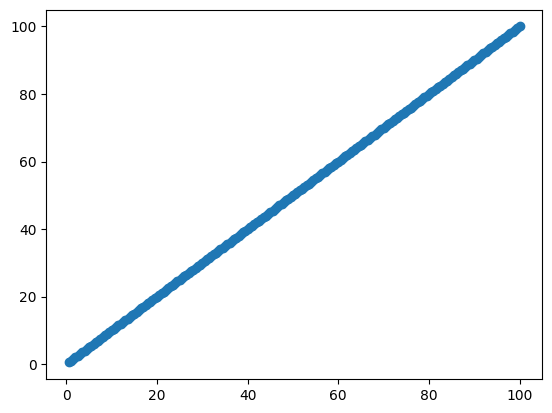

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

x = np.arange(0.5, 100.5, 0.5)
y = np.arange(0.5, 100.5, 0.5)

plt.scatter(x, y, marker='o')

##2. y= $x^2$

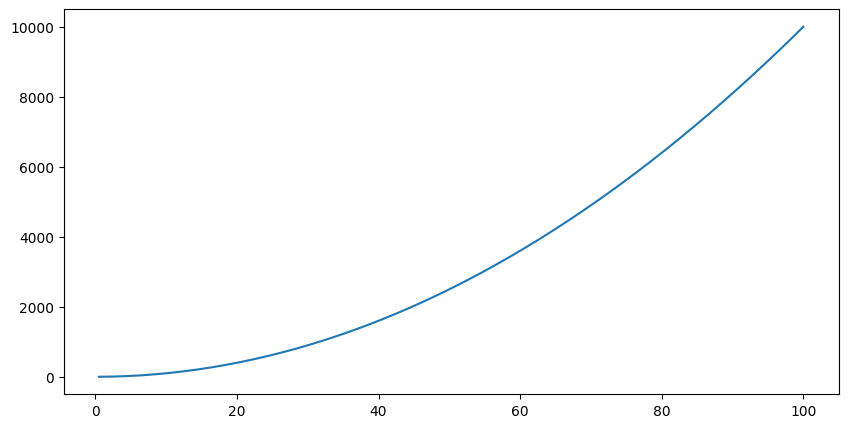

In [ ]:
y = x ** 2

fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, y)

# Show the plot
plt.show()

##3.y = $x^3$/100

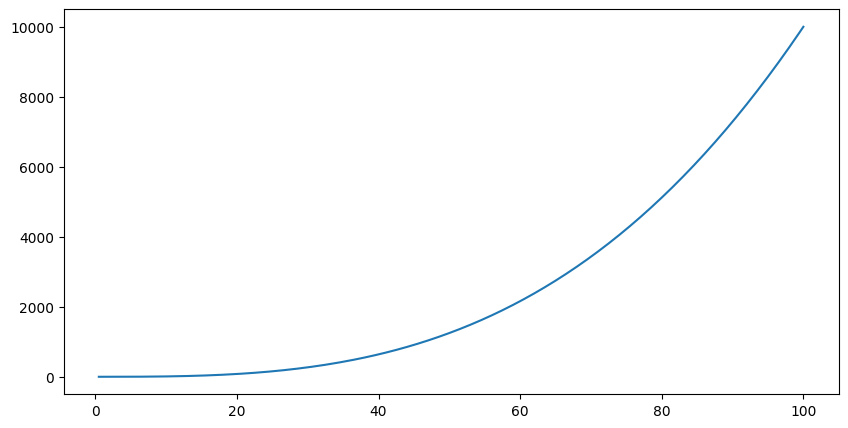

In [ ]:
y = x ** 3/100

fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, y)

# Show the plot
plt.show()

##4. y = sin(x)

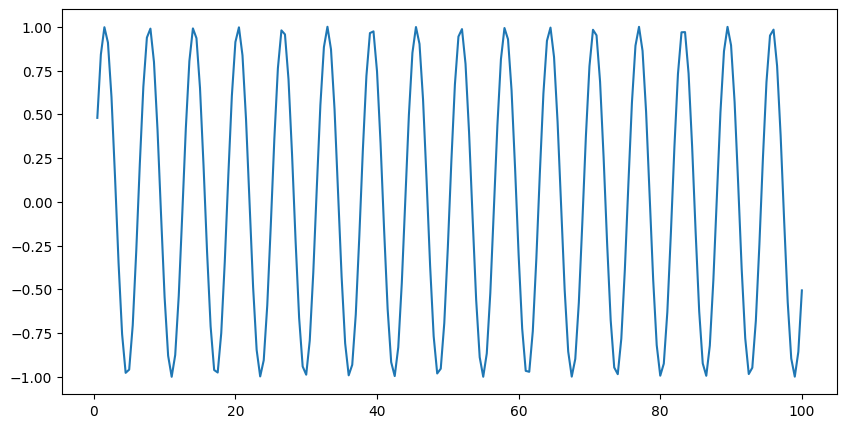

In [ ]:
y = np.sin(x)

fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, y)

# Show the plot
plt.show()

##5. y=sin(x)/x

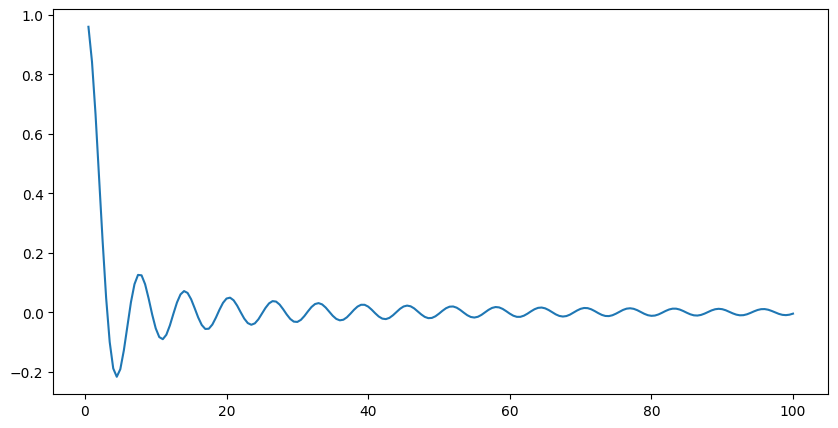

In [ ]:
y =np.sin(x)/x

fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, y)

# Show the plot
plt.show()

##6. y=log(x)

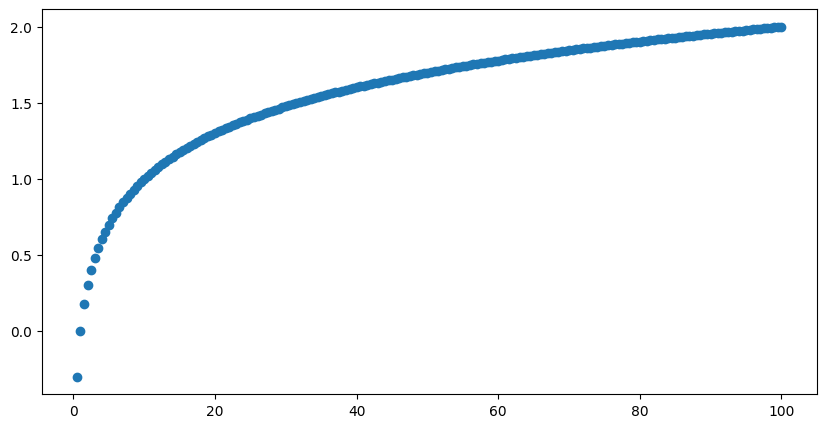

In [ ]:
y =np.log10(x)
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.scatter(x, y)

# Show the plot
plt.show()

##7. y = $e^x$

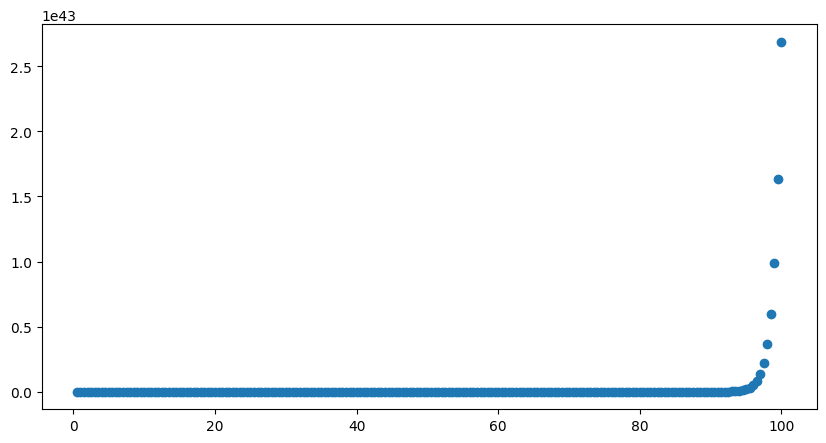

In [ ]:
y =np.exp(x)
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.scatter(x, y)

# Show the plot
plt.show()

#Question 10

Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [ ]:
data = np.random.uniform(low=1, high=2, size=(20,5))
df = pd.DataFrame(data, columns=['a', 'b', 'c', 'd', 'e'])
print(df)

           a         b         c         d         e
0   1.345482  1.677673  1.143487  1.300791  1.000100
1   1.321108  1.487970  1.443819  1.647990  1.167394
2   1.394910  1.603446  1.910489  1.403650  1.586381
3   1.436233  1.820754  1.870897  1.891165  1.951826
4   1.074433  1.278031  1.002515  1.421767  1.758402
5   1.693810  1.272540  1.031873  1.683478  1.265480
6   1.905800  1.138537  1.754066  1.545272  1.191231
7   1.060481  1.054034  1.724614  1.106815  1.451922
8   1.803920  1.949468  1.465040  1.953330  1.544624
9   1.522425  1.659165  1.316602  1.274855  1.096873
10  1.391215  1.440384  1.211681  1.017616  1.035540
11  1.771411  1.592782  1.744002  1.320216  1.329101
12  1.078605  1.730402  1.334907  1.512894  1.968937
13  1.895448  1.982490  1.009871  1.593683  1.789783
14  1.052631  1.884894  1.392504  1.117905  1.362113
15  1.964139  1.967469  1.725118  1.472664  1.438984
16  1.392302  1.538009  1.056891  1.306968  1.489376
17  1.121182  1.663013  1.132490  1.044076  1.

In [ ]:
df.std(axis=0).idxmax()

'a'

In [ ]:
df.mean(axis=0).idxmin()

'd'

#Question 11

Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [ ]:
df["f"] = df["a"] + df["b"] + df["c"] + df["d"] + df["e"]
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")
print(df)
print(df[df["g"] == "LT8"].shape[0])
print(df[df["g"] == "LT8"]["f"].std())
print(df[df["g"] == "GT8"]["f"].std())

           a         b         c         d         e         f    g
0   1.345482  1.677673  1.143487  1.300791  1.000100  6.467533  LT8
1   1.321108  1.487970  1.443819  1.647990  1.167394  7.068281  LT8
2   1.394910  1.603446  1.910489  1.403650  1.586381  7.898877  LT8
3   1.436233  1.820754  1.870897  1.891165  1.951826  8.970876  GT8
4   1.074433  1.278031  1.002515  1.421767  1.758402  6.535148  LT8
5   1.693810  1.272540  1.031873  1.683478  1.265480  6.947180  LT8
6   1.905800  1.138537  1.754066  1.545272  1.191231  7.534906  LT8
7   1.060481  1.054034  1.724614  1.106815  1.451922  6.397867  LT8
8   1.803920  1.949468  1.465040  1.953330  1.544624  8.716382  GT8
9   1.522425  1.659165  1.316602  1.274855  1.096873  6.869919  LT8
10  1.391215  1.440384  1.211681  1.017616  1.035540  6.096436  LT8
11  1.771411  1.592782  1.744002  1.320216  1.329101  7.757512  LT8
12  1.078605  1.730402  1.334907  1.512894  1.968937  7.625745  LT8
13  1.895448  1.982490  1.009871  1.593683  1.78

#Question 12

Write a small piece of code to explain broadcasting in numpy.

In [ ]:
import numpy as np

a = np.array([5, 7, 3, 1])
b = np.array([90, 50, 0, 30])

# array are compatible because of same Dimension
c = a * b
print(c)

[450 350   0  30]


In [ ]:
import numpy as np
a = np.array([17, 11, 19]) # 1x3 Dimension array
print(a)
b = 3
print(b)

# Broadcasting happened because of
# miss match in array Dimension.
c = a + b
print(c)

[17 11 19]
3
[20 14 22]


In [ ]:

import numpy as np

v = np.array([1, 2, 3])
w = np.array([4, 5])

# Outer product of vectors v and w
print(np.reshape(v, (3, 1)) * w)

x = np.array([[1, 2, 3], [4, 5, 6]])

# Broadcasting vector v to matrix x
print(x + v)

# Broadcasting vector w to the transposed matrix x
print((x.T + w).T)

# Reshaping vector w and broadcasting to matrix x
print(x + np.reshape(w, (2, 1)))

# Broadcasting scalar multiplication to matrix x
print(x * 2)

[[ 4  5]
 [ 8 10]
 [12 15]]
[[2 4 6]
 [5 7 9]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 2  4  6]
 [ 8 10 12]]


In [ ]:
macros = np.array([
  [0.8, 2.9, 3.9],
  [52.4, 23.6, 36.5],
  [55.2, 31.7, 23.9],
  [14.4, 11, 4.9]
   ])

result = np.zeros_like(macros)

cal_per_macro = np.array([3, 3, 8])

for i in range(macros.shape[0]):
  result[i, :] = macros[i, :] * cal_per_macro

print(result)

[[  2.4   8.7  31.2]
 [157.2  70.8 292. ]
 [165.6  95.1 191.2]
 [ 43.2  33.   39.2]]


#Question 13

Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [ ]:
def argmin(arr):
  min_val = arr[0]
  min_index = 0
  for i in range(1, len(arr)):
    if arr[i] < min_val:
      min_val = arr[i]
      min_index = i
  return min_index

arr = np.array([1, 2, 3, 4, 5])
print(argmin(arr))
print(np.argmin(arr))

0
0
